In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [3]:
# Importing data
df = pd.read_csv("../input/calcofi/bottle.csv")
df = df.loc[1:1000, ['T_degC', 'Salnty', 'Depthm']]
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,T_degC,Salnty,Depthm
1,10.46,33.440,8
2,10.46,33.437,10
3,10.45,33.420,19
4,10.45,33.421,20
5,10.45,33.431,30


In [4]:
# Creating train and test dataset
msk = np.random.rand(len(df)) < 0.8
train_raw = df[msk]
test_raw = df[~msk]

In [5]:
# Fixing missing values issue and imputing
imputer = SimpleImputer()
train = pd.DataFrame(imputer.fit_transform(train_raw))
train.columns = df.columns
train.rename(columns={'T_degC': 'TEMP', 'Salnty': 'SALINITY', 'Depthm': 'DEPTH'}, inplace=True)
train = train.reindex(columns={'SALINITY', 'DEPTH', 'TEMP'})
print(train.head())

   SALINITY  DEPTH   TEMP
0    33.440    8.0  10.46
1    33.437   10.0  10.46
2    33.421   20.0  10.45
3    33.431   30.0  10.45
4    33.440   39.0  10.45


In [23]:
train_x = train[['SALINITY', 'DEPTH']]
train_y = train[['TEMP']]

In [24]:
# Splitting into train and test dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(train_x, train_y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=1)

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
# Creating model
model = keras.models.Sequential([
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [27]:
# Fitting
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
15/15 [==============================] - 0s 7ms/step - loss: 46.1384 - val_loss: 9.3456
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 3.6391 - val_loss: 2.7942
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.5436 - val_loss: 2.0173
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.2744 - val_loss: 1.8384
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1822 - val_loss: 1.7189
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1415 - val_loss: 1.7335
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1151 - val_loss: 1.6651
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0865 - val_loss: 1.6488
Epoch 9/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0741 - val_loss: 1.6125
Epoch 10/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0552 - val_loss: 1.5976
Epoch 11/20
15/15 

In [28]:
# Evaluating
mse_test = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.1099


In [29]:
# Predicting
pred = model.predict(X_test)
# Accuracy measures
print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - np.asanyarray(y_test))))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - np.asanyarray(y_test)) ** 2))
print("R2-score: %.2f" % r2_score(pred, np.asanyarray(y_test)))

Mean absolute error: 0.78
Residual sum of squares (MSE): 1.11
R2-score: 0.88


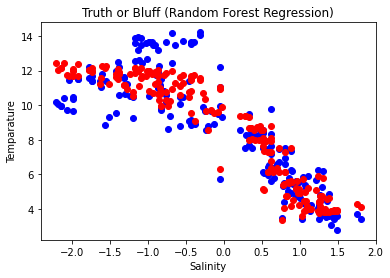

In [40]:
# Plotting
plt.scatter(pd.DataFrame(X_test[:,0]), y_test, color='blue')
plt.scatter(pd.DataFrame(X_test[:,0]), pred, color='red')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel("Salinity")
plt.ylabel("Temparature")
plt.show()